In [1]:
import pandas as pd
import seaborn as sns 

In [2]:
data=pd.read_csv("output.csv")

In [3]:
data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [4]:
data["Anaemic"]=data["Anaemic"].map({"Yes":1,"No":0})

In [5]:
data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,1
1,2,F,45.6033,28.1900,26.2067,13.5,0
2,3,F,45.0107,28.9677,26.0215,11.7,0
3,4,F,44.5398,28.9899,26.4703,13.5,0
4,5,M,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,1
100,101,M,42.2324,30.6757,27.0919,6.3,1
101,102,F,45.6064,31.9084,22.4852,12.7,0
102,103,M,45.2095,29.2769,25.5136,13.4,0


In [6]:
data.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

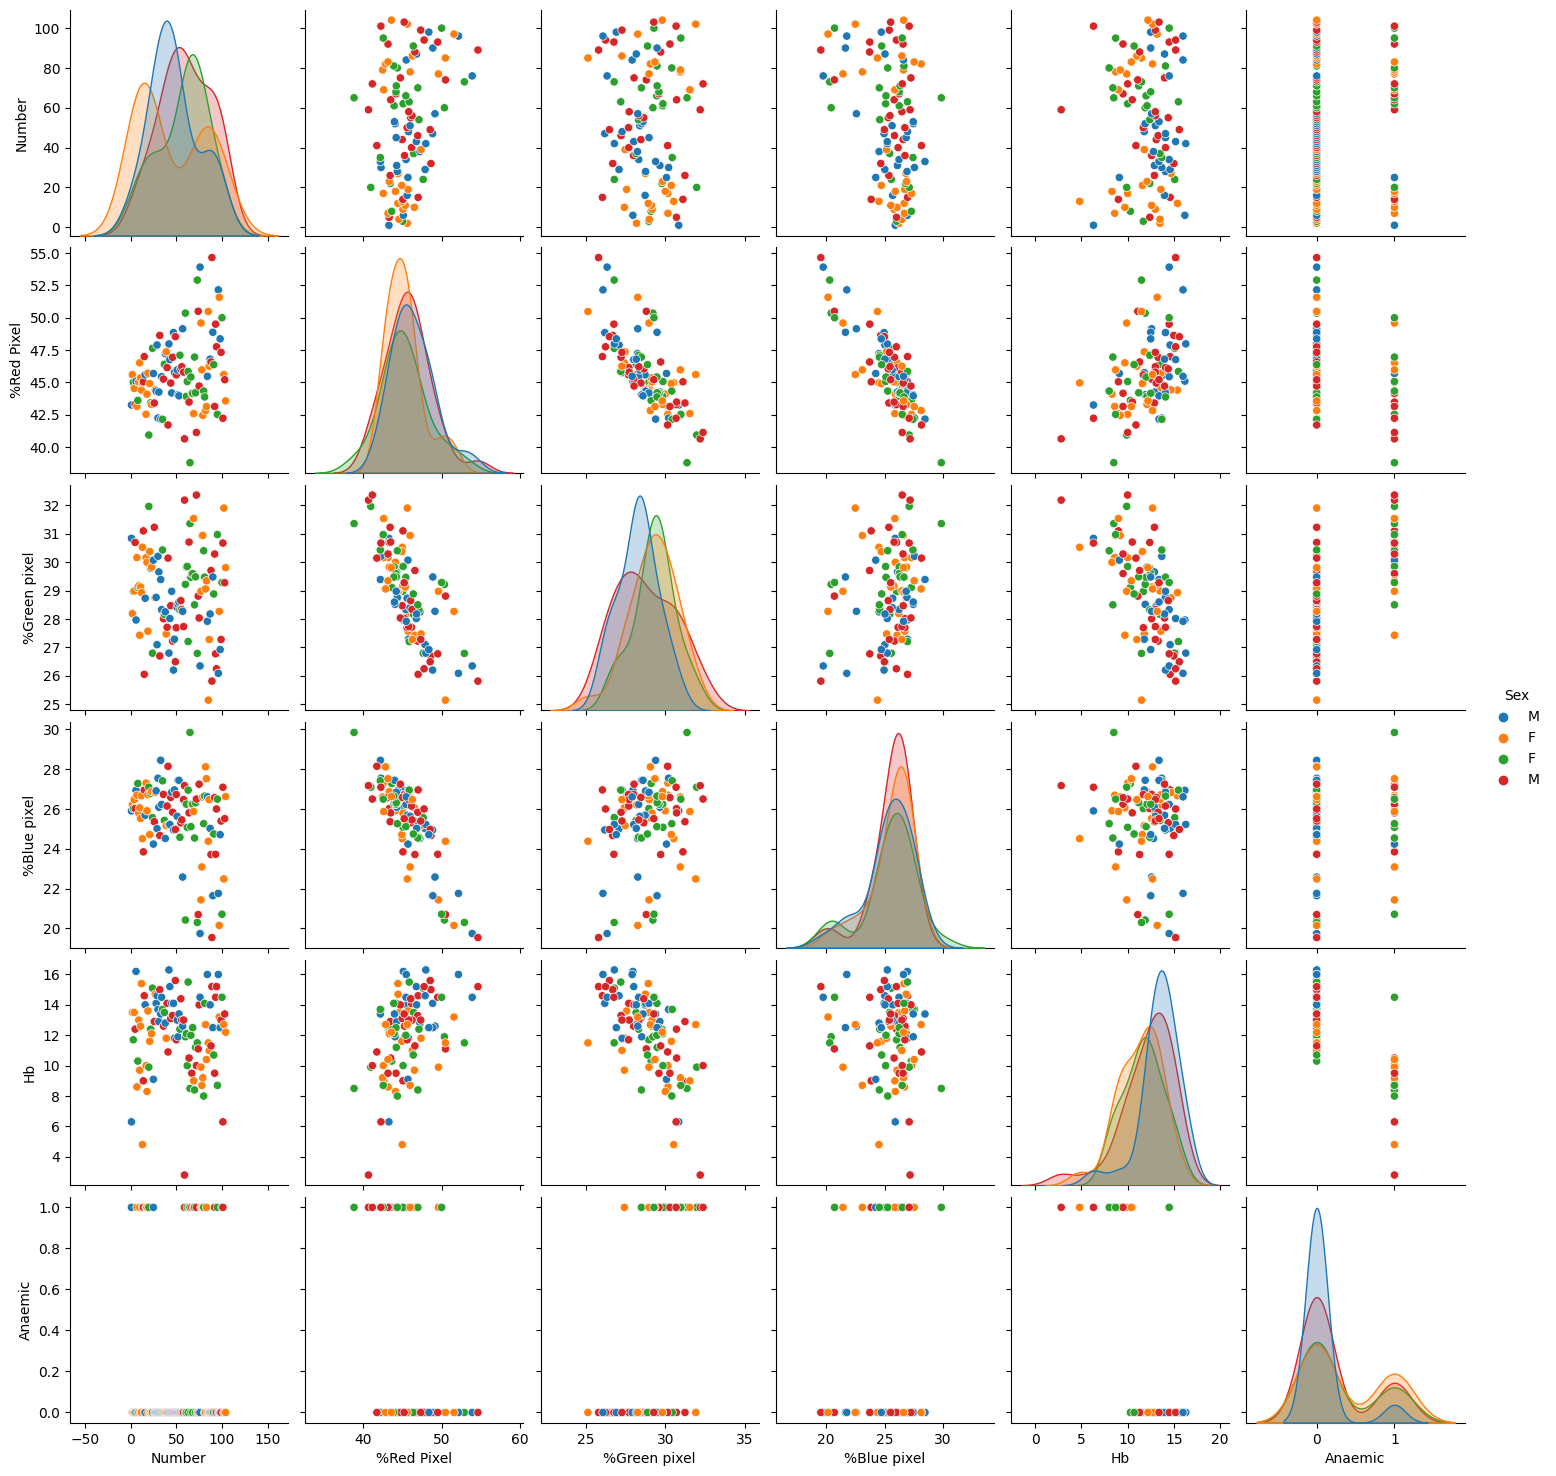

In [7]:
sns.pairplot(data,hue="Sex")

In [8]:
#data cleaning
data["Sex"]=data.Sex.map({"M ":"M","F ":"F","M":"M","F":"F"})

male=data[data["Sex"]=="M"]
female=data[data["Sex"]=="F"]

In [9]:
male.shape


(55, 7)

In [10]:
female.shape

(49, 7)

In [11]:
data=data.drop("Number",axis=1)
data.shape
data["Sex"].unique()

array(['M', 'F'], dtype=object)

In [12]:
data

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,1
1,F,45.6033,28.1900,26.2067,13.5,0
2,F,45.0107,28.9677,26.0215,11.7,0
3,F,44.5398,28.9899,26.4703,13.5,0
4,M,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,1
100,M,42.2324,30.6757,27.0919,6.3,1
101,F,45.6064,31.9084,22.4852,12.7,0
102,M,45.2095,29.2769,25.5136,13.4,0


In [13]:
male=data[data["Sex"]=="M"]
female=data[data["Sex"]=="F"]


In [19]:
#dependent and independent var

xmale=male[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
xfemale=female[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]

ymale=male["Anaemic"]
yfemale=female["Anaemic"]

In [20]:
#test train split

from sklearn.model_selection import train_test_split

xm_train, xm_test, ym_train, ym_test = train_test_split(xmale, ymale, test_size=0.25, random_state=42)

xf_train, xf_test, yf_train, yf_test = train_test_split(xfemale, yfemale, test_size=0.25, random_state=42)


In [21]:
print(xm_train.shape,
xf_train.shape,
xm_test.shape,
xf_test.shape)

(41, 4) (36, 4) (14, 4) (13, 4)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid={"C":[1,2,3,7,9,20,30,50,70,90,100]}
lr = GridSearchCV(LogisticRegression(),param_grid,cv=5)

In [55]:
# Male
lr.fit(xm_train,ym_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 7, 9, 20, 30, 50, 70, 90, 100]})

In [56]:
print(lr.best_score_)

0.975


In [57]:
ym_pred=lr.predict(xm_test)

In [33]:
print(ym_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [58]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ym_test, ym_pred)
acc

1.0

In [49]:
# Female
lr2 = GridSearchCV(LogisticRegression(),param_grid,cv=5)

In [50]:
lr2.fit(xf_train, yf_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 7, 9, 20, 30, 50, 70, 90, 100]})

In [51]:
print(lr2.best_score_)

0.8928571428571429


In [52]:
yf_pred=lr2.predict(xf_test)
print(ym_pred)


[1 0 0 1 0 1 0 1 1 0 0 0 0]


In [53]:
acc = accuracy_score(yf_test, yf_pred)
acc

1.0